## Project Name: "Customer Segmentation Using Clustering Techniques"

### Project Goal

The goal of this project is to segment the company’s customers based on their demographic information, behavioral data, and purchasing habits. This will help the business better understand its customers, optimize marketing strategies, and personalize communications for each segment.

### Project Objectives:

* Clean and prepare the customer data.
* Perform exploratory data analysis to understand customer behavior.
* Use clustering techniques to identify distinct customer segments.
* Analyze the characteristics of each segment to provide actionable insights for the business.

## Imports

### Import packages

In [187]:
#For data manipulation and analysis
import pandas as pd

#For numerical operations
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For clustering algorithms and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [188]:
# Load dataset into a dataframe
data = pd.read_csv('customer_segmentation.csv')

# Display first few rows of the dataframe
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Understanding

In [189]:
#Gather basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Columns Overview:
* **ID:** Unique identifier for each customer.
* **Year_Birth:** The year the customer was born.
* **Education:** The highest level of education attained by the customer.
* **Marital_Status:** The customer’s marital status.
* **Income:** The yearly income of the customer.
* **Kidhome:** The number of children in the customer’s household.
* **Teenhome:** The number of teenagers in the customer’s household.
* **Dt_Customer:** The date the customer was enrolled in the company’s database.
* **Recency:** The number of days since the customer’s last purchase.
* **Spending columns (MntWines, MntFruits, etc.):** Amount spent on different categories like wines, fruits, meat, fish, etc.
* **Purchase behavior columns (NumWebPurchases, NumCatalogPurchases, etc.):** Number of purchases through different channels like the web, catalog, or in-store.
* **Marketing response columns (AcceptedCmp1, AcceptedCmp2, etc.):** Whether the customer accepted the offer from a specific marketing campaign.
* **Complain:** Whether the customer made a complaint in the last 2 years.
* **Z_CostContact, Z_Revenue:** Constant columns with no variation (we will drop these).
* **Response:** Whether the customer accepted the last campaign.

## Data Cleaning

### Handle missing values

In [190]:
# Check for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [191]:
# Replace missing values in 'Income' with the median value
data['Income'].fillna(data['Income'].median(), inplace=True)

### Fix incorrect data types

In [192]:
# Convert 'Dt_Customer' to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

### Create new features

In [193]:
# Create 'Age' column from 'Year_Birth'
data['Age'] = 2024 - data['Year_Birth']

### Check duplicates

In [194]:
# Check for duplicates
data.duplicated().sum()

0

### Drop Irrelevant Columns

In [195]:
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

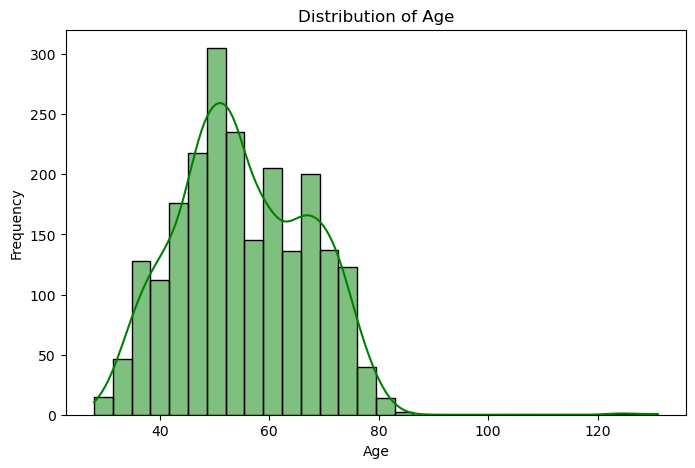

In [196]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='g')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [197]:
# Filter and display rows where Age > 100
data[data['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,131
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,125


In [198]:
# Exclude rows where Age > 100
data = data[data['Age'] <= 100]

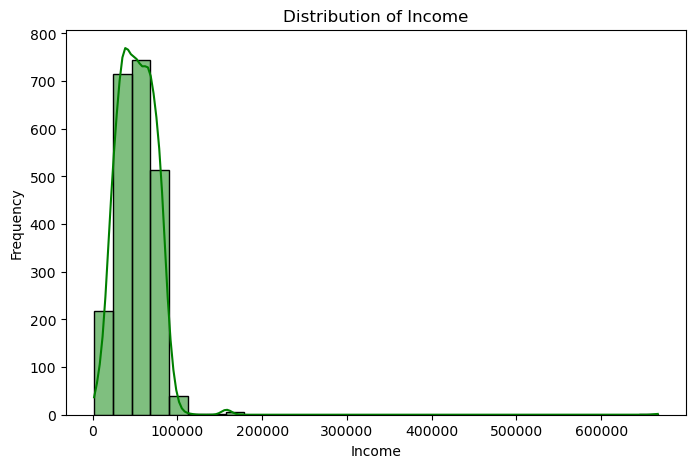

,Income
count,2237.000000
mean,52227.407689
std,25043.266830
min,1730.000000
25%,35523.000000
50%,51381.500000
75%,68281.000000
max,666666.000000


In [199]:
# Income Distribution
x = data['Income']
plt.figure(figsize=(8, 5))
sns.histplot(x, bins=30, kde=True, color='g')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

pd.DataFrame(x.describe())

In [200]:
q1 = data['Income'].quantile(0.25)
q3 = data['Income'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

,Income
count,2229.000000
mean,51619.504262
std,20601.216248
min,1730.000000
25%,35416.000000
50%,51381.500000
75%,68118.000000
max,113734.000000


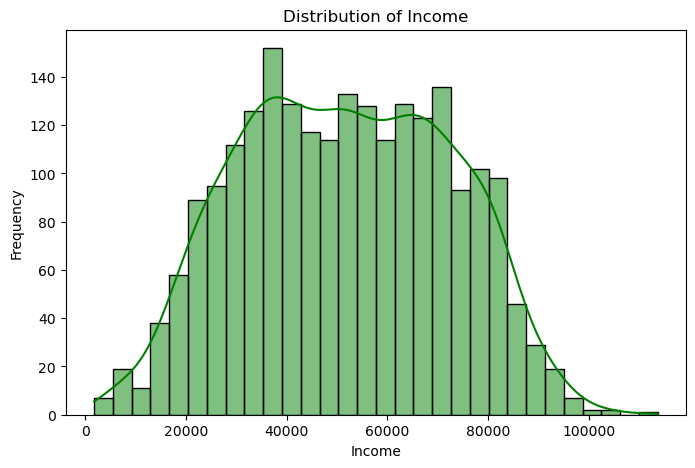

In [201]:
x = data['Income']
plt.figure(figsize=(8, 5))
sns.histplot(x, bins=30, kde=True, color='g')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

pd.DataFrame(x.describe())

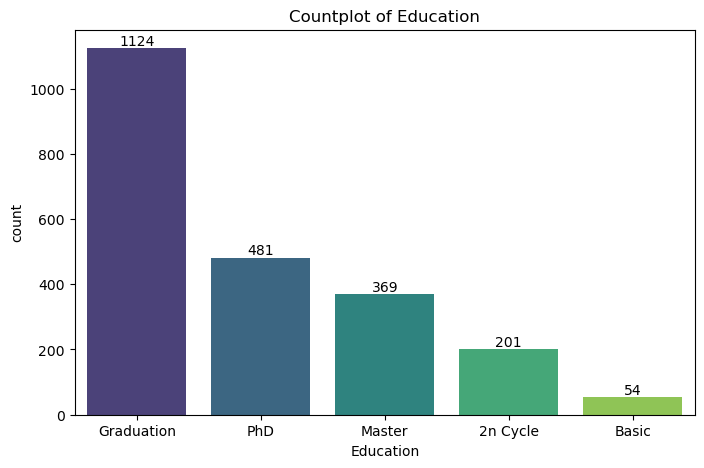

In [202]:
# Countplot for Education
plt.figure(figsize=(8, 5))
sorted_education = data['Education'].value_counts().index
ax = sns.countplot(x='Education', data=data, order=sorted_education, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', 
            ha='center', va='bottom')

plt.title('Countplot of Education')
plt.show()

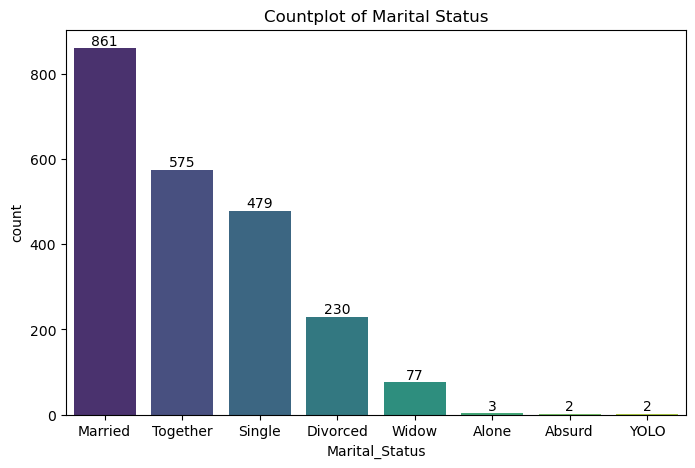

In [203]:
# Countplot for Marital Status
plt.figure(figsize=(8, 5))
sorted_marital_status = data['Marital_Status'].value_counts().index
ax = sns.countplot(x='Marital_Status', data=data, order=sorted_marital_status, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', 
            ha='center', va='bottom')

plt.title('Countplot of Marital Status')
plt.show()

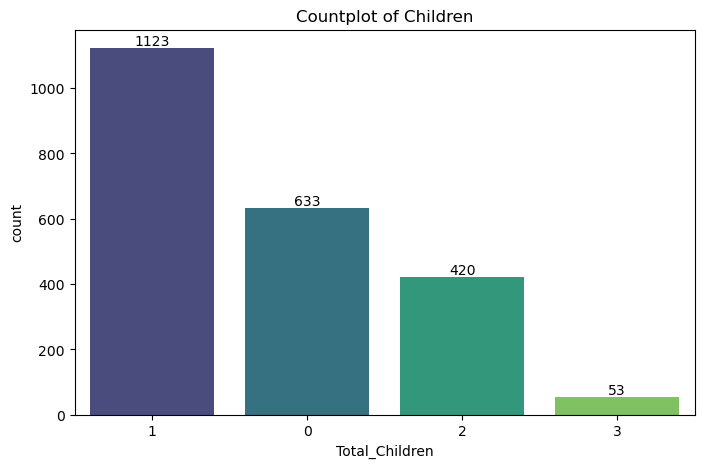

In [204]:
# Countplot for Total Children
plt.figure(figsize=(8, 5))
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
sorted_children = data['Total_Children'].value_counts().index
ax = sns.countplot(x='Total_Children', data=data, order=sorted_children, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', 
            ha='center', va='bottom')

plt.title('Countplot of Children')
plt.show()

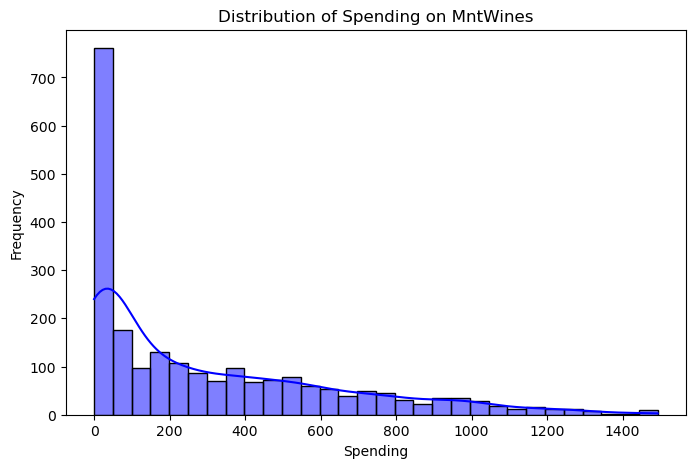

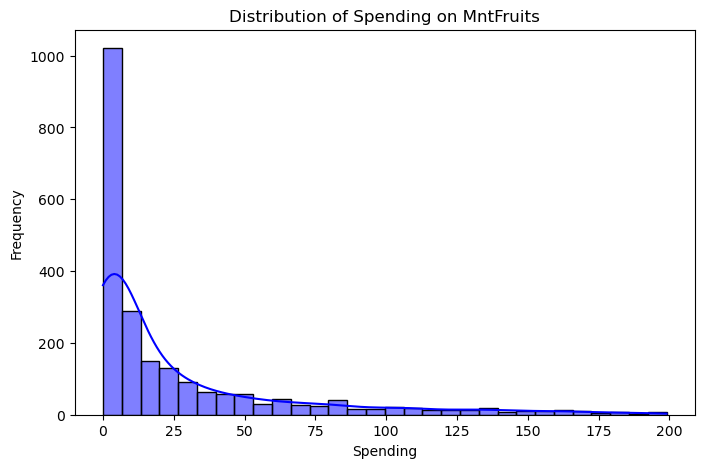

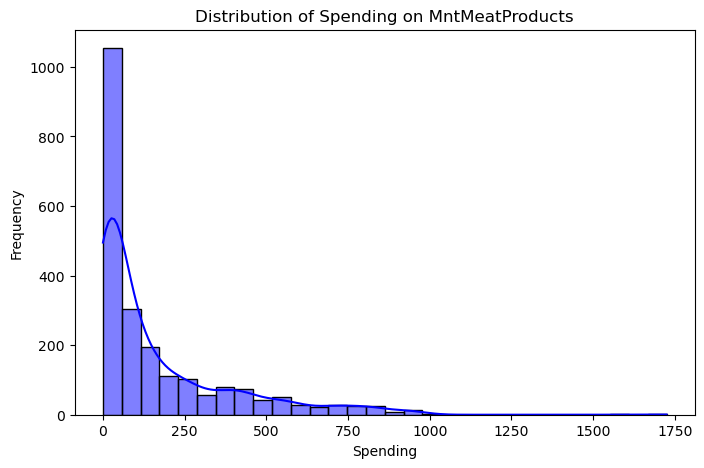

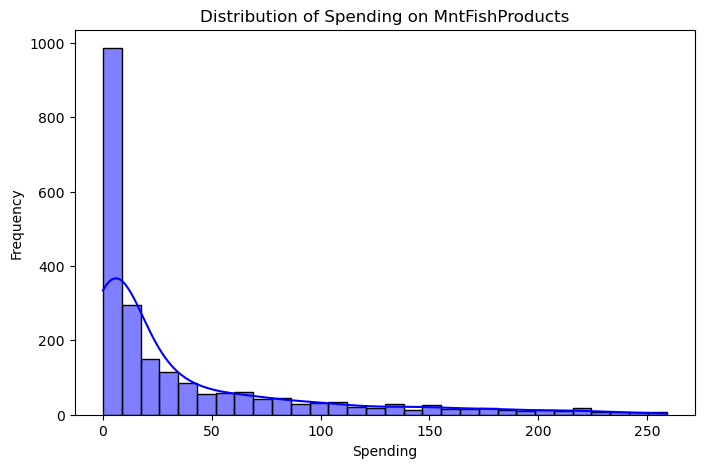

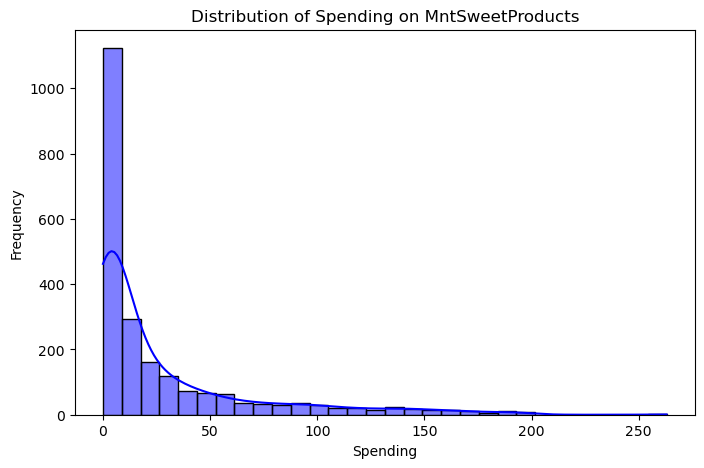

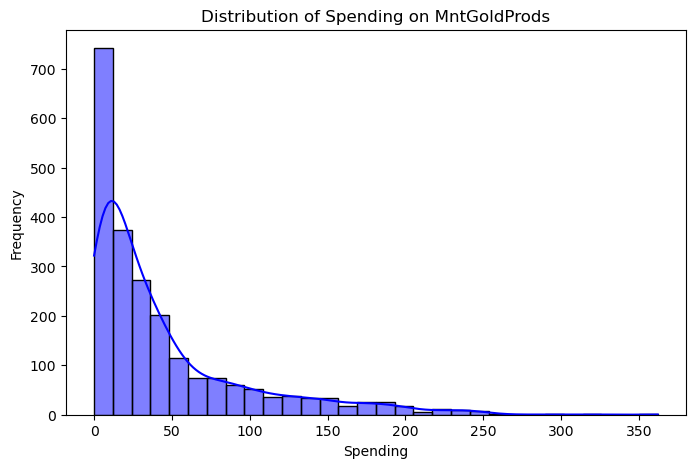

In [205]:
# List of product categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plot histograms for each product category
for product in product_categories:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[product], bins=30, kde=True, color='b')
    plt.title(f'Distribution of Spending on {product}')
    plt.xlabel('Spending')
    plt.ylabel('Frequency')
    plt.show()

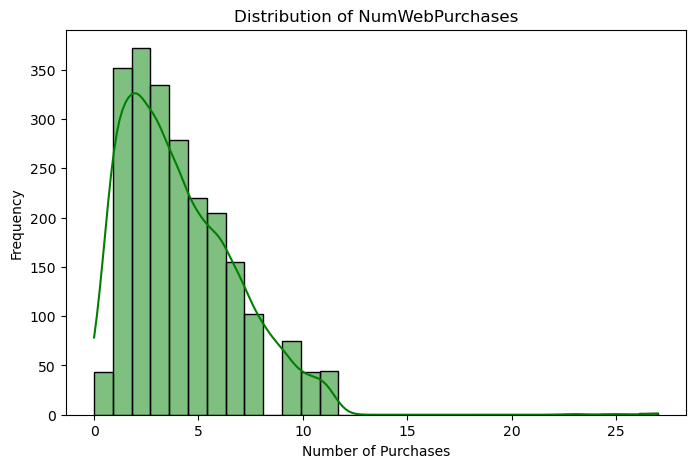

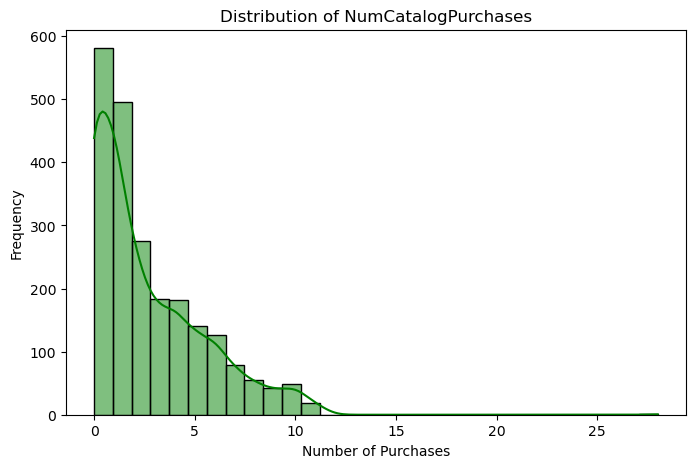

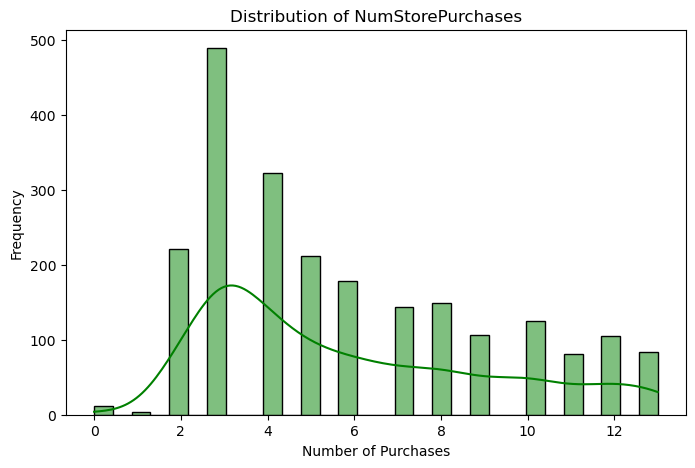

In [206]:
# List of purchase behavior categories
purchase_behaviors = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Plot histograms for each purchase behavior
for behavior in purchase_behaviors:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[behavior], bins=30, kde=True, color='g')
    plt.title(f'Distribution of {behavior}')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Frequency')
    plt.show()

### Bivariate Analysis

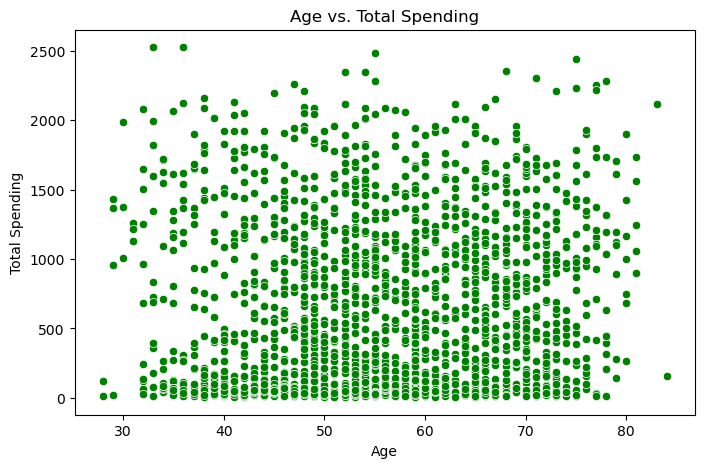

In [207]:
# Create a new column for total spending across all product categories
data['Total_Spending'] = (data['MntWines'] + data['MntFruits'] + 
                          data['MntMeatProducts'] + data['MntFishProducts'] +
                          data['MntSweetProducts'] + data['MntGoldProds'])

# Age vs. Spending on Wines
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Total_Spending', data=data, color='g')
plt.title('Age vs. Total Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()

There appears to be a weak relationship between age and total spending. Spending is distributed across different age groups, with no clear trend indicating that older or younger customers spend significantly more or less.

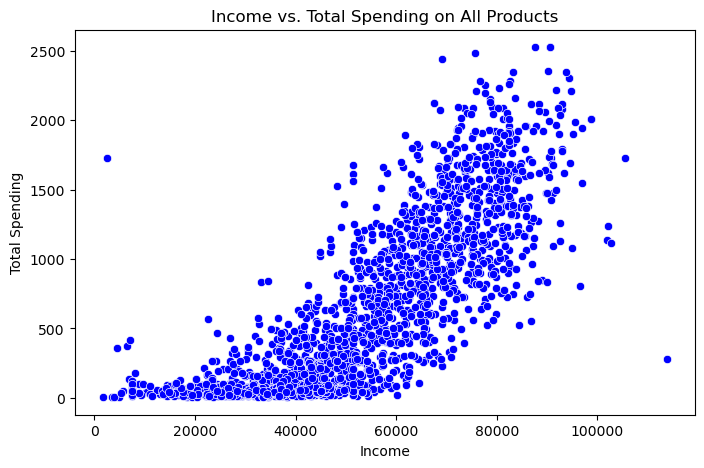

In [208]:
# Income vs. Total Spending
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='Total_Spending', data=data, color='b')
plt.title('Income vs. Total Spending on All Products')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

A strong positive correlation is observed between income and total spending. As income increases, total spending on products tends to rise.

## Data preprocessing

In [209]:
# Select relevant features for clustering
data = data.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Total_Children'])

In [210]:
# One-hot encoding for Education and Marital_Status
encoder = LabelEncoder()

data['Education'] = encoder.fit_transform(data['Education'])
data['Marital_Status'] = encoder.fit_transform(data['Marital_Status'])

In [211]:
# Display the first few rows to confirm the changes
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,67,1617
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,70,27
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,59,776
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,40,53
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,43,422


In [212]:
# Normalize the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#normalized_data = scaler.fit_transform(data)

## K-Means Clustering

In [213]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data) #
    wcss.append(kmeans.inertia_)

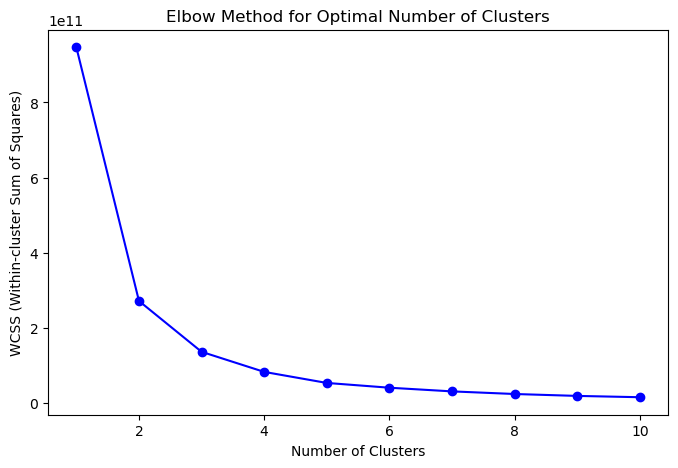

In [214]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [215]:
# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

In [216]:
# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

In [217]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending,Cluster
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,1617,2
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,27,2
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,776,1
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,53,0
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,422,2


## Cluster Analysis

In [218]:
# Group by cluster and calculate the mean of each feature
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.162726,3.705146,27996.503477,0.813630,0.308762,48.401947,29.563282,5.783032,24.922114,9.025035,...,6.909597,0.084840,0.004172,0.000000,0.001391,0.000000,0.015299,0.115438,50.781641,92.681502
1,2.469274,3.720670,75499.455307,0.093575,0.378492,48.981844,622.554469,56.567039,385.688547,81.333799,...,3.308659,0.071229,0.135475,0.220670,0.178771,0.026536,0.006983,0.236034,56.621508,1276.452514
2,2.531486,3.759446,51477.051637,0.426952,0.803526,49.856423,268.036524,17.721662,93.634761,24.157431,...,5.734257,0.064232,0.084383,0.005038,0.018892,0.013854,0.005038,0.103275,57.670025,464.953401


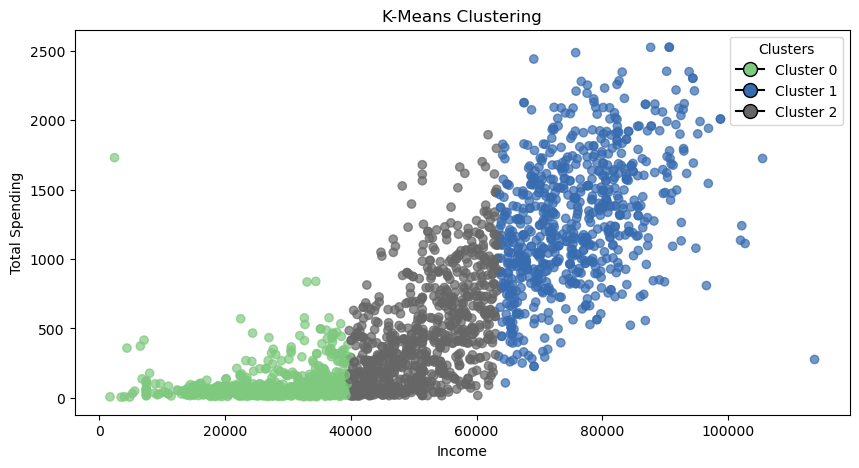

In [219]:
# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

# Create a scatter plot
scatter = plt.scatter(data['Income'], data['Total_Spending'], c=cluster_labels, cmap='Accent', alpha=0.7)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='black', label=f'Cluster {i}', 
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
                   for i in range(3)]
plt.legend(handles=legend_elements, title='Clusters')

plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Total Spending')

plt.show()


In [220]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(data, cluster_labels)
print(f'Davies-Bouldin Index: {dbi:.4f}')

Silhouette Score: 0.5514
Davies-Bouldin Index: 0.5391


**Overall Observations:**
* **Cluster 0:** Represents a low-income, low-spending segment, likely more focused on budget-friendly products and showing lower engagement with campaigns.
* **Cluster 1:** Represents high-income, high-spending customers who are the most valuable segment, with strong responsiveness to campaigns and a preference for premium products like wine.
* **Cluster 2:** Represents a middle-income segment with moderate spending, more likely to have children, and showing moderate engagement with marketing efforts.